<a href="https://colab.research.google.com/github/ArnavBhatia68/MAT-421-HW/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW6 – Arnav Bhatia

Course: MAT421

Date: 02/21

1. Continuity and Differentiation

1.1 Concept of Continuity

A function f(x) is continuous if it does not have any abrupt jumps or breaks for all x in its domain. Formally,
lim x->a f(x) = f(a) for every a in the domain.

Below, we will define a function that is continuous on [0,5] and plot it.


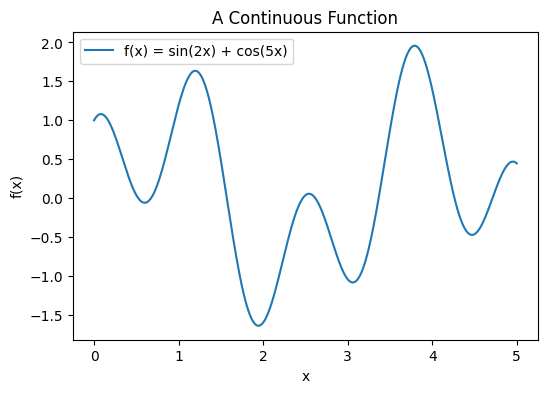

In [2]:


import numpy as np
import matplotlib.pyplot as plt


# f(x) = sin(2x) + cos(5x)
x_vals = np.linspace(0, 5, 500)
y_vals = np.sin(2*x_vals) + np.cos(5*x_vals)

plt.figure(figsize=(6,4))
plt.plot(x_vals, y_vals, label="f(x) = sin(2x) + cos(5x)")
plt.title("A Continuous Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()



1.2 Differentiation

The derivative of a function f(x) measures how f changes as x changes.
We can approximate derivatives numerically or use symbolic tools.


1.2.1 Numerical Derivative (Finite Differences)

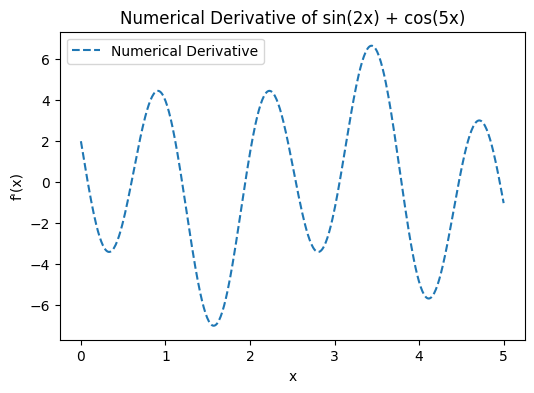

In [3]:


# Numerical differentiation with finite differences
h = 1e-3  # step size
# derivative approx: f'(x) ~ [f(x+h) - f(x)] / h

num_deriv = (np.sin(2*(x_vals + h)) + np.cos(5*(x_vals + h)) - y_vals)/h

plt.figure(figsize=(6,4))
plt.plot(x_vals, num_deriv, '--', label="Numerical Derivative")
plt.title("Numerical Derivative of sin(2x) + cos(5x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.show()


1.2.2 Symbolic Differentiation (Sympy)

In [4]:


import sympy

x_sym = sympy.Symbol('x', real=True)
f_expr = sympy.sin(2*x_sym) + sympy.cos(5*x_sym)
f_prime_expr = f_expr.diff(x_sym)  # symbolic derivative

print("Symbolic derivative of sin(2x) + cos(5x) =", f_prime_expr)


Symbolic derivative of sin(2x) + cos(5x) = -5*sin(5*x) + 2*cos(2*x)


We can then evaluate f_prime_expr at specific x-values if we want.


2. Taylor’s Theorem

Taylor’s theorem says that a sufficiently differentiable function f around x=a can be approximated by a polynomial of degree n:

f(x) ~= f(a) + f′(a)(x−a) + (f′′(a)/2!)(x−a)^2 + ⋯

Below, we use Sympy to expand our function f(x) = sin(2x) + cos(5x) around x=0.


In [5]:


from sympy import series

taylor_series = f_expr.series(x_sym, 0, 5)  # up to x^4 terms
# Remove the "Order" term for cleaner printing
taylor_poly = taylor_series.removeO()

print("Taylor expansion of sin(2x) + cos(5x) around x=0 up to x^4:")
taylor_poly


Taylor expansion of sin(2x) + cos(5x) around x=0 up to x^4:


625*x**4/24 - 4*x**3/3 - 25*x**2/2 + 2*x + 1

We can also compare the Taylor polynomial to the original function near x=0:

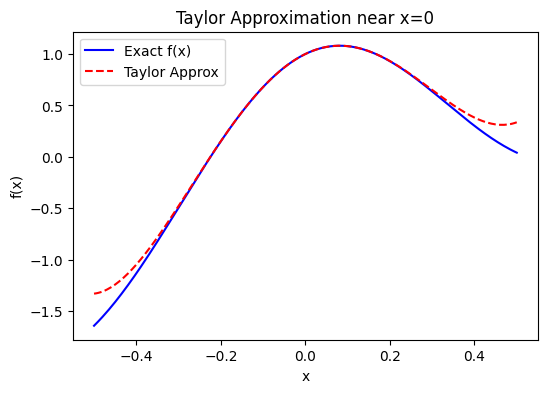

In [6]:


f_approx_expr = taylor_poly
# Convert to a "lambda" for numerical evaluation
f_approx = sympy.lambdify(x_sym, f_approx_expr, 'numpy')

x_near_0 = np.linspace(-0.5, 0.5, 200)
y_exact   = np.sin(2*x_near_0) + np.cos(5*x_near_0)
y_approx  = f_approx(x_near_0)

plt.figure(figsize=(6,4))
plt.plot(x_near_0, y_exact, 'b', label="Exact f(x)")
plt.plot(x_near_0, y_approx, 'r--', label="Taylor Approx")
plt.title("Taylor Approximation near x=0")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


Observe that near x=0, the Taylor polynomial matches the original function well; farther away, the approximation diverges more.

